In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Step 1: Define the Data


In [3]:
data = {
    'Model': ['GPT-3.5', 'GPT-4', 'LLaMA 2', 'T5', 'BART'],
    'Perplexity': [15, 10, 12, 20, 18],      # Lower is better
    'BLEU': [0.65, 0.75, 0.70, 0.60, 0.55],    # Higher is better
    'InferenceTime': [0.5, 0.7, 0.6, 0.4, 0.8],# Lower is better
    'MemoryUsage': [4, 6, 5, 3, 7]             # Lower is better
}

# Create a DataFrame
df = pd.DataFrame(data)

# Step 2: Define Weights and Criteria Type

In [4]:
weights = {
    'Perplexity': 0.3,
    'BLEU': 0.4,
    'InferenceTime': 0.2,
    'MemoryUsage': 0.1
}

criteria_type = {
    'Perplexity': 'cost',
    'BLEU': 'benefit',
    'InferenceTime': 'cost',
    'MemoryUsage': 'cost'
}

# Step 3: Normalize the Decision Matrix

In [5]:
criteria_columns = ['Perplexity', 'BLEU', 'InferenceTime', 'MemoryUsage']
normalized_matrix = df[criteria_columns].copy()

for col in criteria_columns:
    denom = np.sqrt((df[col] ** 2).sum())
    normalized_matrix[col] = df[col] / denom

# Step 4: Construct the Weighted Normalized Matrix

In [6]:
weighted_normalized_matrix = normalized_matrix.copy()
for col in criteria_columns:
    weighted_normalized_matrix[col] = normalized_matrix[col] * weights[col]

# Step 5: Determine the Ideal and Anti-Ideal Solutions

In [7]:
ideal_solution = {}
anti_ideal_solution = {}

for col in criteria_columns:
    if criteria_type[col] == 'benefit':
        ideal_solution[col] = weighted_normalized_matrix[col].max()
        anti_ideal_solution[col] = weighted_normalized_matrix[col].min()
    else:
        ideal_solution[col] = weighted_normalized_matrix[col].min()
        anti_ideal_solution[col] = weighted_normalized_matrix[col].max()

# Step 6: Calculate the Separation Measures (Distances)

In [8]:
S_positive = []
S_negative = []

for _, row in weighted_normalized_matrix.iterrows():
    sum_sq_pos = sum((row[col] - ideal_solution[col]) ** 2 for col in criteria_columns)
    sum_sq_neg = sum((row[col] - anti_ideal_solution[col]) ** 2 for col in criteria_columns)
    S_positive.append(np.sqrt(sum_sq_pos))
    S_negative.append(np.sqrt(sum_sq_neg))

df['S_positive'] = S_positive
df['S_negative'] = S_negative

# Step 7: Calculate the Relative Closeness to the Ideal Solution

In [9]:
df['RelativeCloseness'] = df['S_negative'] / (df['S_positive'] + df['S_negative'])


# Step 8: Rank the Models

In [10]:
df['Rank'] = df['RelativeCloseness'].rank(ascending=False)
df_sorted = df.sort_values(by='RelativeCloseness', ascending=False)

# Save Results to CSV

In [15]:
df_sorted.to_csv('topsis_results.csv', index=False)

# Visualization - Bar Chart

C:\Users\HP\AppData\Local\Temp\ipykernel_22092\1599744490.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_sorted['RelativeCloseness'], y=df_sorted['Model'], palette='viridis')


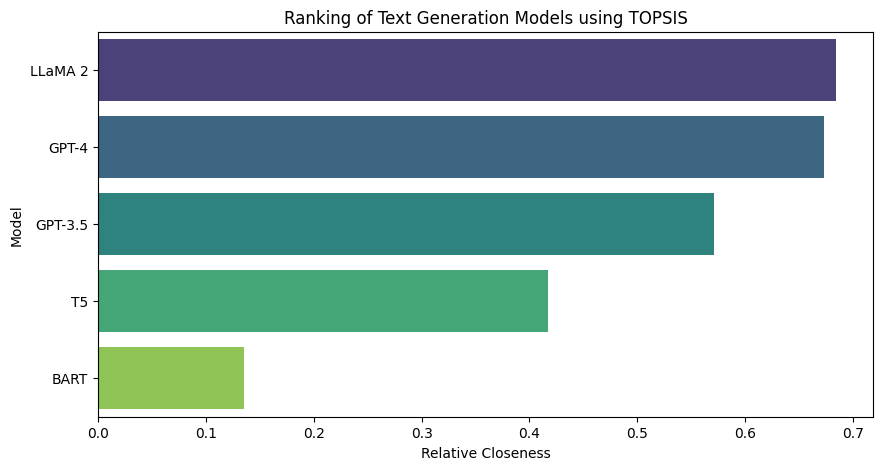

In [18]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df_sorted['RelativeCloseness'], y=df_sorted['Model'], palette='viridis')
plt.xlabel('Relative Closeness')
plt.ylabel('Model')
plt.title('Ranking of Text Generation Models using TOPSIS')
plt.savefig('ranking_bar_chart.jpg')
plt.show()

# Visualization - Heatmap

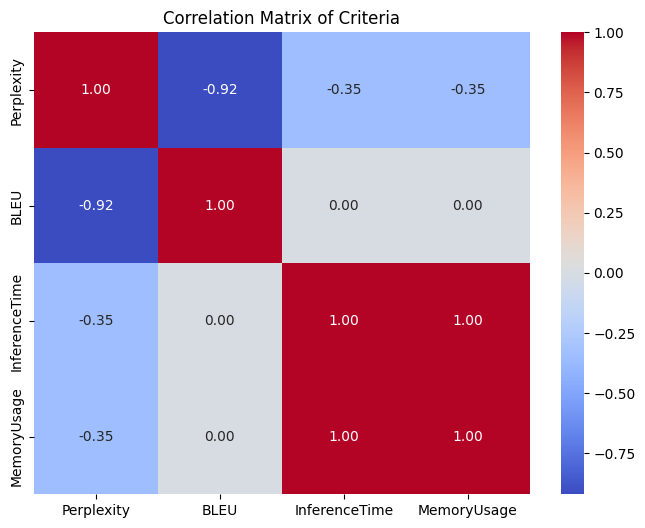

In [19]:
corr_matrix = df[criteria_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Criteria')
plt.savefig('correlation_heatmap.jpg')
plt.show()

# Print Final Ranking Table

In [16]:
print("Final Ranking of Models:")
print(df_sorted[['Model', 'RelativeCloseness', 'Rank']])


Final Ranking of Models:
     Model  RelativeCloseness  Rank
2  LLaMA 2           0.684373   1.0
1    GPT-4           0.672728   2.0
0  GPT-3.5           0.571579   3.0
3       T5           0.417502   4.0
4     BART           0.135060   5.0
